# <center> Case study: Survival classification with Titanic dataset </center>

## 1. Quick reviews
||Regression|Clasification|
|-|-|-|
|Data|Attribute-value description|Attribute-value description|
|Target|Continuous|Nominal|
|Evaluation methods|Cross-validation, train test split ...|Cross-validation, train test split ...|
|Errors|MSE, MAE, RMSE|1-accuracy|
|Algorithms|Linear regression|Logistic Regression, Decision Tree, Naive Bayes ...|
|Baseline|Mean of target|Majority class|

## 2. Titanic dataset
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons for the sinking of the Titanic was the lack of supplies and medical expertise. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data as explained below:

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|fare| Passenger fare||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|
|deck|||

The goal is to predict if a passenger survived the sinking of the Titanic or not (`survived`), regarding the passenger’s attributes. 

# Import libraries

# Load and quick view data

# EDA

## Descriptive analysis

In [ ]:
df_num = 
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = np.ceil(df_num.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=20, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

## Diagnostic Analysis

In [ ]:
df = 
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = np.ceil(df.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    
    ax.set_title('Survied by {}'.format(c))
    ax.set_ylabel(None)
    plt.xticks(rotation=360)

# Other
plt.tight_layout()
plt.show()

In [ ]:
df = 
# Figure
fig = plt.figure(figsize=(18, 12))

# Define grid
ncols = 3
nrows = np.ceil(df.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df.drop('survived',axis=1).columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    
    ax.set_title('Survied by {}'.format(c))
    ax.set_ylabel(None)
#     plt.xticks(rotation=360)

# Other
plt.tight_layout()
plt.show()

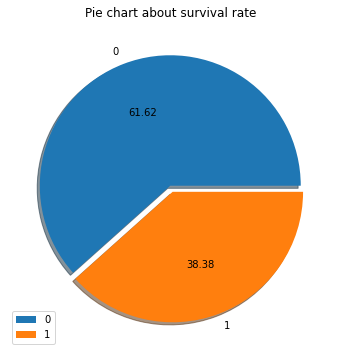

In [14]:
titanic_stats = titanic.survived.value_counts()
plt.figure(figsize = (6,6))
plt.pie(titanic_stats, labels = titanic_stats.index, autopct = '%.2f', explode=[0,0.05], shadow=True)
plt.title('Pie chart about survival rate')
plt.legend()
plt.show()

# Data preprocessing